# Makemore: Bigram Language Model
Studying Andrej Karpathy's makemore model

In [4]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [1]:
words = open('names.txt', 'r').read().splitlines()

## Counts and Probabilities of Bigrams

In [5]:
alphabet = list(map(chr, range(97, 123)))
stoi = {s:i+1 for i,s in enumerate(alphabet)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [17]:
Count = torch.zeros((27, 27), dtype=torch.int32)

for w in words:
  processed = ['.'] + list(w) + ['.'] # adds dots to the beginning and end of the word
  for ch1, ch2 in zip(processed, processed[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    Count[ix1, ix2] += 1

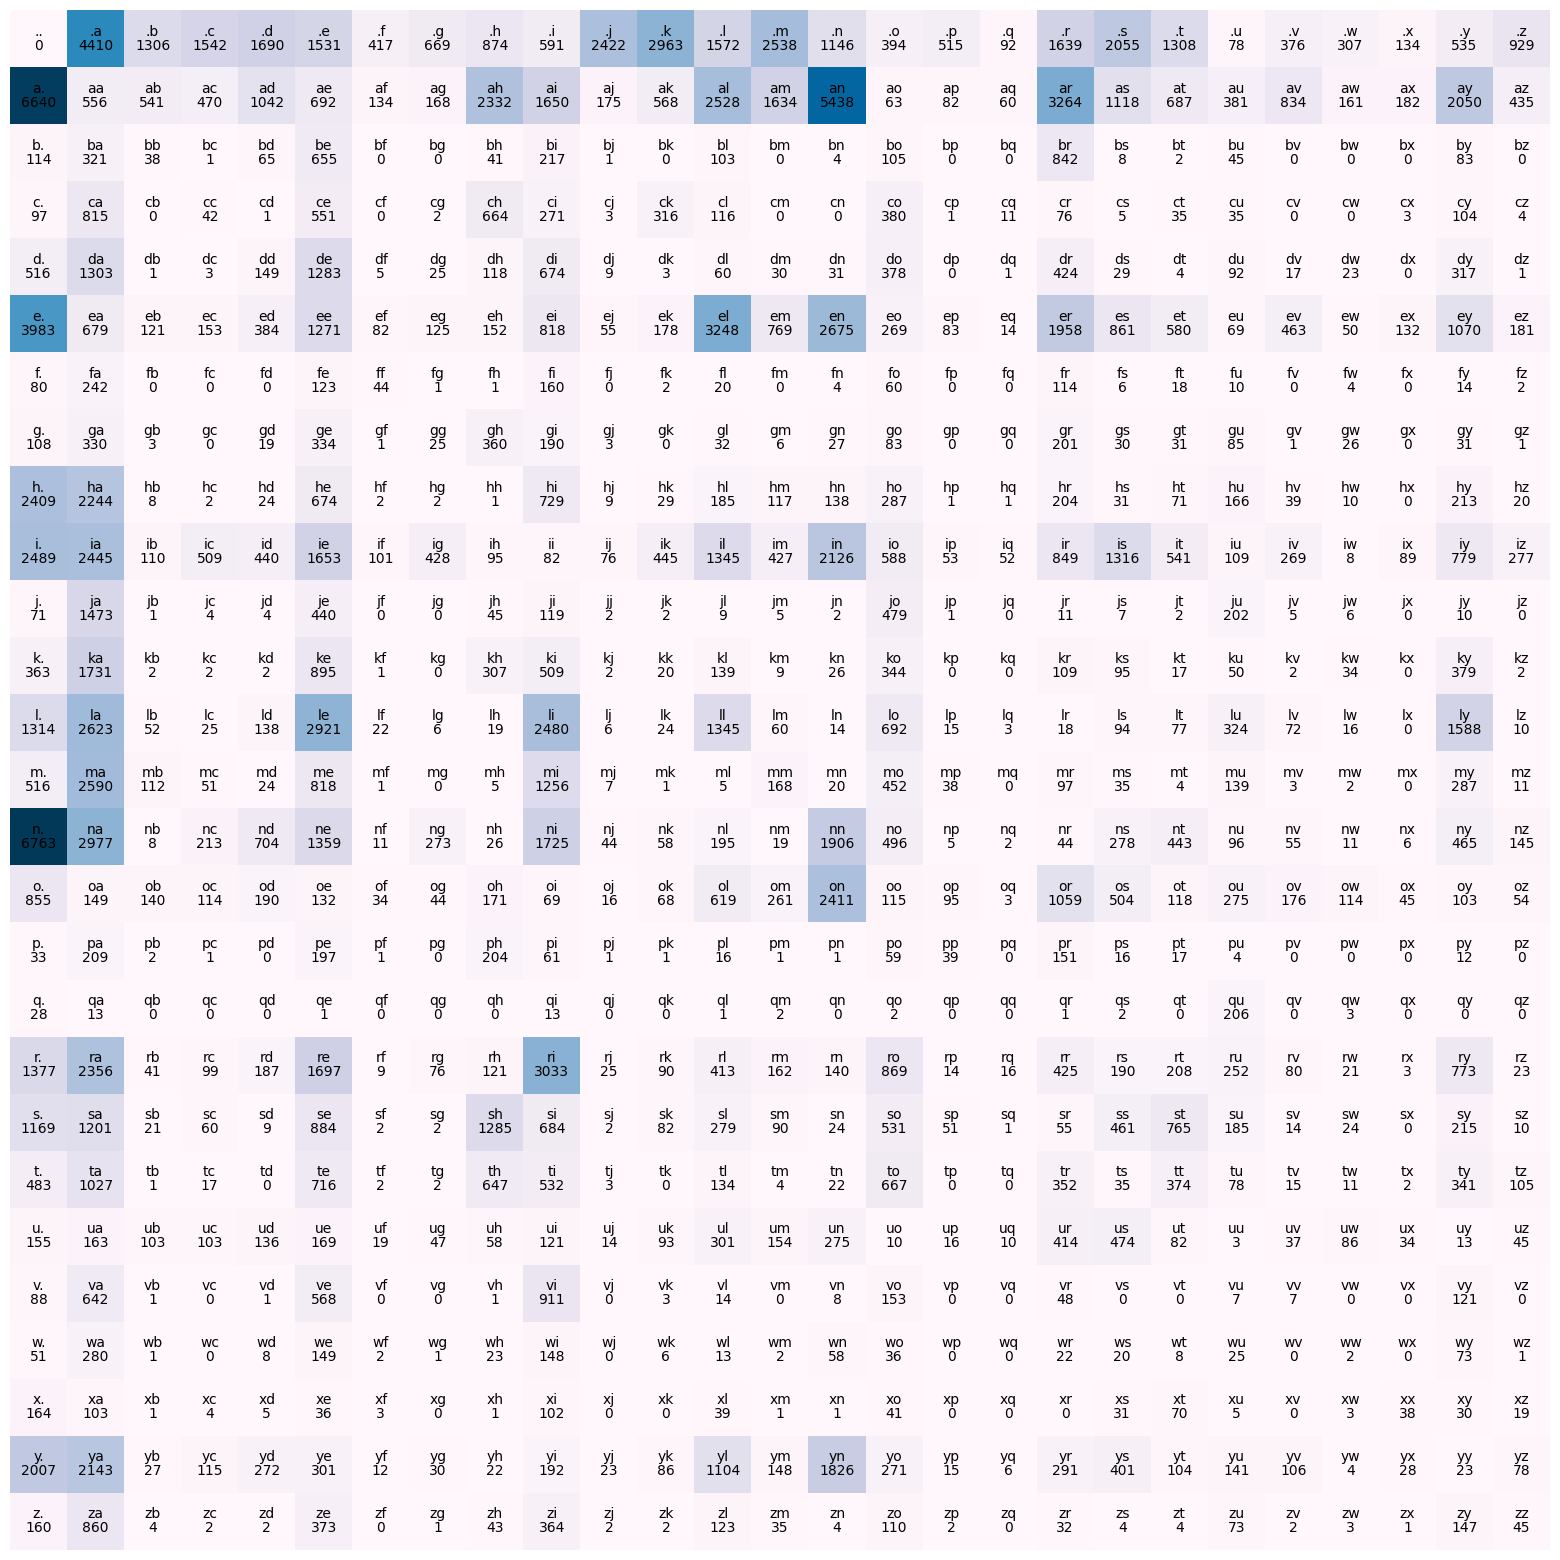

In [18]:
plt.figure(figsize=(20,20))
plt.imshow(Count, cmap='PuBu')

for i in range(27):
    for j in range(27):
        charPair = itos[i] + itos[j]
        plt.text(j, i, charPair, ha="center", va="bottom", color='black')
        plt.text(j, i, Count[i, j].item(), ha="center", va="top", color='black')

plt.axis('off');

In [27]:
Prob = (Count + 1).float()  # add one to avoid zero probabilities
sumRow = P.sum(1, keepdim=True)

Prob = Prob / sumRow
Prob[13].sum()  # Probabilities sum to 1

tensor(1.)

## Generating Random Names

In [32]:
for i in range(5):
  out = []
  ix = 0

  while True:
    
    p = Prob[ix]  # probabilities of the next character given the current character
    ix = torch.multinomial(p, num_samples=1, replacement=True).item() # random choosing
    out.append(itos[ix])

    if ix == 0:   # if end of the word
      break

  print(''.join(out))

bryman.
min.
m.
tyabeiny.
bel.


The results are horrible. We are going to make many more modifications to improve this.

## Log Likelihood

In [33]:
log_likelihood = 0.0
n = 0

for w in words:
  processed = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(processed, processed[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    curProb = Prob[ix1, ix2]
    logprob = torch.log(curProb)
    log_likelihood += logprob
    n += 1

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


## One Hot Encoding

In [34]:
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [51]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

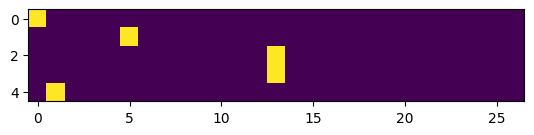

In [36]:
plt.imshow(xenc)

## Weights

In [55]:
W = torch.randn((27, 27))
print(xenc.shape, W.shape)
xenc @ W

torch.Size([5, 27]) torch.Size([27, 27])


tensor([[ 0.6590,  1.3353,  0.5429, -0.8914, -0.5476,  0.1008, -0.2100,  2.4962,
          0.5306, -1.0748,  0.2441,  0.6220,  0.8576, -0.9977, -1.7276, -0.4413,
         -0.1004, -0.4820, -1.3639, -0.8772,  0.0267, -0.1745, -2.2468,  0.7990,
          1.7563, -0.5762, -0.8472],
        [ 0.7179,  0.0059, -0.8136,  0.3445,  1.5571, -1.5637,  1.0436,  0.9508,
          0.0902, -1.5274, -0.0843, -0.6100, -1.8725,  0.9914,  1.0961, -0.6079,
         -1.4991, -0.8549, -0.3063,  1.7335,  2.4654, -0.3357, -2.0152,  0.2037,
          0.9258, -0.0753,  1.2084],
        [ 1.0509, -0.3072, -0.1114,  2.2999,  0.3584, -0.1969,  1.2924,  0.8227,
         -0.6264, -0.1494, -1.1235,  0.2564,  1.6454, -0.1630,  1.1589,  0.5276,
         -0.9875, -1.2205,  0.2673,  0.4165, -0.3712,  0.8682,  0.9969, -0.3137,
         -0.4213,  1.1057,  0.1308],
        [ 1.0509, -0.3072, -0.1114,  2.2999,  0.3584, -0.1969,  1.2924,  0.8227,
         -0.6264, -0.1494, -1.1235,  0.2564,  1.6454, -0.1630,  1.1589,  0.5276

In [61]:
logits = xenc @ W # log-counts
counts = logits.exp() # counts
probs = counts / counts.sum(1, keepdims=True) # probabilities of next char

## Loss

In [63]:
loss = -probs[torch.arange(5), ys].log().mean() # average of negative log likelihood
loss

tensor(3.6478)

## Dataset for NN

In [67]:
xs, ys = [], []

for w in words:
  processed = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(processed, processed[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.shape[0]

## Gradient Descent

In [68]:
W = torch.randn((27, 27), requires_grad=True)

for k in range(100):
  
  xenc = F.one_hot(xs, num_classes=27).float() # one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  W.grad = None
  loss.backward()
  
  W.data += -50 * W.grad

3.8549017906188965
3.393702268600464
3.154545545578003
3.0114173889160156
2.9212632179260254
2.8574609756469727
2.80924654006958
2.770984172821045
2.739684581756592
2.713606834411621
2.6916258335113525
2.672938585281372
2.656933307647705
2.643122434616089
2.6311120986938477
2.620586395263672
2.611290216445923
2.6030220985412598
2.595618963241577
2.58895206451416
2.5829169750213623
2.5774285793304443
2.5724167823791504
2.567824602127075
2.5636017322540283
2.5597078800201416
2.556105852127075
2.5527658462524414
2.5496606826782227
2.546767234802246
2.54406476020813
2.5415358543395996
2.5391643047332764
2.536935806274414
2.534839153289795
2.532862424850464
2.530996561050415
2.5292320251464844
2.5275614261627197
2.5259783267974854
2.5244758129119873
2.5230484008789062
2.521690845489502
2.520397901535034
2.5191657543182373
2.517990827560425
2.516869068145752
2.5157978534698486
2.514772891998291
2.513792037963867
2.512852907180786
2.5119528770446777
2.511089324951172
2.5102603435516357
2.5094

## Testing NN

In [73]:
for i in range(5):
  
  out = []
  ix = 0
  while True:

    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W   # Trained W from previous cell
    counts = logits.exp()
    p = counts / counts.sum(1, keepdims=True)
    
    ix = torch.multinomial(p, num_samples=1, replacement=True).item()
    out.append(itos[ix])
    if ix == 0:
      break

  print(''.join(out))

ley.
kahueye.
sianile.
y.
thiva.


Still awful so far..